In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

In [2]:
# Conexión a BD
# ==============================================================================
import pyodbc

In [3]:
# Configuración de BD y conexión
# ==============================================================================
direccion_servidor = '192.168.1.32,55078'
nombre_bd = 'BDVirunet'
nombre_usuario = 'sa'
password = '123456'

try:
    conexion = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=' + 
                              direccion_servidor+';DATABASE='+nombre_bd+';UID='+nombre_usuario+';PWD=' + password)
    print("Conexión exitosa")
    
except Exception as e:
    print("Ocurrió un error al conectar a SQL Server: ", e)

Conexión exitosa


In [4]:
dFechaInicio = '2020-01-01'
dFechaFin = '2020-12-31'

In [ ]:
try:
    with conexion.cursor() as cursor:
            consulta = "exec STP_OBTENER_TOTALIZADO_PLAGAS ?,?,?,?"
            cursor.execute(consulta, (dFechaInicio, dFechaFin, 1,1))

            rows = cursor.fetchall()
            
            cols = []
            
            for i,_ in enumerate(cursor.description):
                cols.append(cursor.description[i][0])

            pd.DataFrame(np.array(rows), columns = cols)
            
            df = pd.DataFrame(columns =['Evaluador','Fecha','Fundo','Filtrado','Turno','Lote','Grupo_Plaga','Plaga','Caracteristica','Suma','Grado','Promedio','Porcentaje'] )
            for i in range(len(rows)):
                df.loc[i] = list(rows[i])
except Exception as e: 
    print(e)

In [6]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [7]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [8]:
arrPlagas = df["Plaga"].unique()
arrFiltrado = df["Filtrado"].unique()

In [9]:
from pathlib import Path
from datetime import datetime

In [11]:
df["Lote"].unique().shape[0]

117

In [12]:
df["Filtrado"].unique()

array(['10', '10N', '11N', '17', '20', '28', '29', '9N'], dtype=object)

In [13]:
df17 = df[df["Filtrado"] == "17"]

In [14]:
df17["Plaga"].unique()

array(['TRIPS TABACI', 'OLYGONICHUS PUNICAE, OLIGONYCHUS YOTHERSI',
       'BEMISIA TABACI', 'ALEURODICUS COCOIS, ALEURODICUS JULEIKAE'],
      dtype=object)

### BEMISIA TABACI

In [15]:
dfPlg = df17[df17["Plaga"] == "BEMISIA TABACI"]
dfPlg.shape[0]

958

In [17]:
dfPlg["Caracteristica"].unique()

array(['G° INFESTACIÓN (NINFAS-ADULTOS)'], dtype=object)

In [18]:
dfCarac = dfPlg[dfPlg["Caracteristica"] == "G° INFESTACIÓN (NINFAS-ADULTOS)" ]

In [19]:
dfPoda = dfCarac
dfPoda = dfPoda.sort_values(by=['Fecha'])
dfPoda.reset_index(drop = True, inplace = True)
dfPoda.head(10)

,Evaluador,Fecha,Fundo,Filtrado,Turno,Lote,Grupo_Plaga,Plaga,Caracteristica,Suma,Grado,Promedio,Porcentaje
0,kobeso,2020-01-08,VIRU - PALTO,17,F17,1702,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),2,1,--,--
1,driveros,2020-01-08,VIRU - PALTO,17,F17,1705,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),4,1,--,--
2,driveros,2020-01-08,VIRU - PALTO,17,F17,1716,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),4,1,--,--
3,mmarquina,2020-01-08,VIRU - PALTO,17,F17,1711,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),3,1,--,--
4,mmarquina,2020-01-08,VIRU - PALTO,17,F17,1714,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),5,1,--,--
5,mmarquina,2020-01-08,VIRU - PALTO,17,F17,1706,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),2,1,--,--
6,karaujo,2020-01-08,VIRU - PALTO,17,F17,1710,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),10,1,--,--
7,karaujo,2020-01-08,VIRU - PALTO,17,F17,1724,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),8,1,--,--
8,mmarquina,2020-01-08,VIRU - PALTO,17,F17,1723,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),2,1,--,--
9,karaujo,2020-01-08,VIRU - PALTO,17,F17,1707,HOJAS,BEMISIA TABACI,G° INFESTACIÓN (NINFAS-ADULTOS),12,1,--,--


In [22]:
dfPlagaFilter = dfPoda[["Fecha","Plaga","Suma"]]

In [23]:
dfPlagaFilter

,Fecha,Plaga,Suma
0,2020-01-08,BEMISIA TABACI,2
1,2020-01-08,BEMISIA TABACI,4
2,2020-01-08,BEMISIA TABACI,4
3,2020-01-08,BEMISIA TABACI,3
4,2020-01-08,BEMISIA TABACI,5
...,...,...,...
953,2020-12-18,BEMISIA TABACI,5
954,2020-12-18,BEMISIA TABACI,5
955,2020-12-18,BEMISIA TABACI,5
956,2020-12-18,BEMISIA TABACI,14


In [24]:
dfPlagaFilter['Semana'] = pd.to_datetime(dfPlagaFilter['Fecha'], format='%Y-%m-%d').dt.weekofyear
dfPlagaFilter

,Fecha,Plaga,Suma,Semana
0,2020-01-08,BEMISIA TABACI,2,2
1,2020-01-08,BEMISIA TABACI,4,2
2,2020-01-08,BEMISIA TABACI,4,2
3,2020-01-08,BEMISIA TABACI,3,2
4,2020-01-08,BEMISIA TABACI,5,2
...,...,...,...,...
953,2020-12-18,BEMISIA TABACI,5,51
954,2020-12-18,BEMISIA TABACI,5,51
955,2020-12-18,BEMISIA TABACI,5,51
956,2020-12-18,BEMISIA TABACI,14,51


In [25]:
tabla_fenologia_excel = pd.ExcelFile('D:/Proyectos GitHub/Python/Datos/Tabla_Fenologia.xlsx')
df_fenologia = tabla_fenologia_excel.parse('Hoja1')  
tabla_fenologia_excel.close()

In [26]:
result = pd.merge(dfPlagaFilter,df_fenologia,on='Semana')
result

,Fecha,Plaga,Suma,Semana,Porcentaje
0,2020-01-08,BEMISIA TABACI,2,2,0.0
1,2020-01-08,BEMISIA TABACI,4,2,0.0
2,2020-01-08,BEMISIA TABACI,4,2,0.0
3,2020-01-08,BEMISIA TABACI,3,2,0.0
4,2020-01-08,BEMISIA TABACI,5,2,0.0
...,...,...,...,...,...
953,2020-12-18,BEMISIA TABACI,5,51,0.6
954,2020-12-18,BEMISIA TABACI,5,51,0.6
955,2020-12-18,BEMISIA TABACI,5,51,0.6
956,2020-12-18,BEMISIA TABACI,14,51,0.6


In [27]:
data_weather = pd.ExcelFile('D:/Proyectos GitHub/Python/Datos/Datos Climaticos Viru Palto.xlsx')
df_weather = data_weather.parse('TABLA')  
data_weather.close()

In [28]:
df_weather = df_weather[df_weather['Año'] == 2020]
df_weather.reset_index(drop = True, inplace = True)

In [29]:
df_weather = df_weather[['Fecha','ET(mm).','Tº MIN/DIA (°C)','Tº MAX/DIA (°C)','Rad. Solar Prom.','HUMEDAD PROM.', 'T° Prom/Día (°C)']]
df_weather = df_weather.rename(columns = {'ET(mm).' : 'ET', 
                                      'Tº MIN/DIA (°C)' : 'T_MIN',
                                     'Tº MAX/DIA (°C)': 'T_MAX',
                                     'Rad. Solar Prom.' : 'RS_PROM',
                                     'HUMEDAD PROM.': 'HM_PROM',
                                      'T° Prom/Día (°C)': 'TMP_PROM'})

In [30]:
dx = result.groupby(['Fecha'])['Suma'].transform(max) == result['Suma']
result = result[dx].drop_duplicates()

In [34]:
fl_df_weather = df_weather[df_weather['Fecha'].isin(result['Fecha'])]

In [35]:
fl_df_weather = fl_df_weather.sort_values(by=['Fecha'])
fl_df_weather.reset_index(drop = True, inplace = True)
fl_df_weather = fl_df_weather.rename(columns = {'Fecha' : 'FechaClima'})

fl_df_weather.shape[0]

69

In [38]:
result.reset_index(drop = True, inplace = True)

In [39]:
result.shape[0]

69

In [40]:
df_union = fl_df_weather.join(result)
df_union

,FechaClima,ET,T_MIN,T_MAX,RS_PROM,HM_PROM,TMP_PROM,Fecha,Plaga,Suma,Semana,Porcentaje
0,2020-01-08,4.4,17.6,27.3,262.3,74.0,22.731250,2020-01-08,BEMISIA TABACI,12,2,0.0
1,2020-01-16,4.2,19.1,28.2,249.8,85.0,22.833333,2020-01-16,BEMISIA TABACI,15,3,0.6
2,2020-01-21,3.9,18.7,28.2,232.3,81.0,23.514583,2020-01-21,BEMISIA TABACI,18,4,0.0
3,2020-01-30,4.6,19.0,27.6,289.0,83.0,22.941667,2020-01-30,BEMISIA TABACI,17,5,0.0
4,2020-02-04,3.8,20.1,27.6,239.9,83.0,22.720833,2020-02-04,BEMISIA TABACI,12,6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...
64,2020-12-02,3.6,16.7,24.7,233.3,83.0,16.852083,2020-12-02,BEMISIA TABACI,24,49,0.0
65,2020-12-03,3.9,16.1,24.9,249.6,81.0,16.664583,2020-12-03,BEMISIA TABACI,11,49,0.0
66,2020-12-11,3.6,17.2,25.6,224.9,86.0,17.458333,2020-12-11,BEMISIA TABACI,8,50,0.0
67,2020-12-12,3.1,16.8,24.9,194.6,84.0,18.341667,2020-12-12,BEMISIA TABACI,25,50,0.0


In [41]:
df_union_filter = df_union[["Fecha","ET", "T_MIN","T_MAX","RS_PROM","HM_PROM","TMP_PROM","Porcentaje","Suma"]]
df_union_filter[["Suma"]] = df_union_filter[["Suma"]].apply(pd.to_numeric)

In [49]:
dfCorrelacion = df_union_filter.corr(method='pearson').abs()

In [50]:
dfCorrelacion

,ET,T_MIN,T_MAX,RS_PROM,HM_PROM,TMP_PROM,Porcentaje,Suma
ET,1.000000,0.561257,0.850252,0.958822,0.532930,0.706603,0.050553,0.371558
T_MIN,0.561257,1.000000,0.788325,0.424524,0.484900,0.846849,0.058463,0.285575
T_MAX,0.850252,0.788325,1.000000,0.760460,0.624479,0.881227,0.029054,0.441732
RS_PROM,0.958822,0.424524,0.760460,1.000000,0.437934,0.558563,0.082233,0.349849
HM_PROM,0.532930,0.484900,0.624479,0.437934,1.000000,0.599977,0.284089,0.382611
TMP_PROM,0.706603,0.846849,0.881227,0.558563,0.599977,1.000000,0.021346,0.372238
Porcentaje,0.050553,0.058463,0.029054,0.082233,0.284089,0.021346,1.000000,0.046986
Suma,0.371558,0.285575,0.441732,0.349849,0.382611,0.372238,0.046986,1.000000


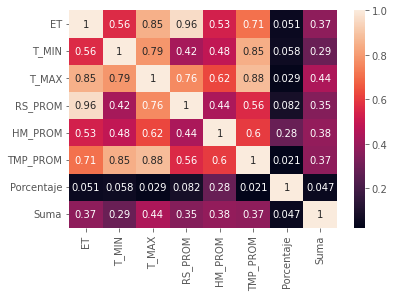

In [51]:
ax = sns.heatmap(dfCorrelacion, annot = True)
plt.show()